## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


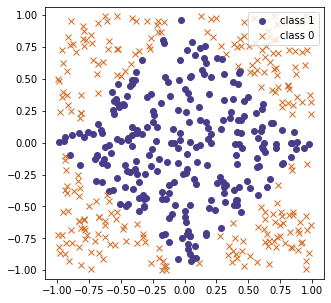

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [3]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_der(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
#     y_true.dtype = np.dtype('float64')
#     y_pred.dtype = np.dtype('float64')
#     print(y_true.shape)
#     print(y_pred.shape)

    loss = log_loss(y_true, y_pred)
    return loss
#     y_pred = np.maximum(y_pred,eps)
#     y_pred = np.minimum(y_pred,(1-eps))
#     return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)
    



def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

def relu(z):
    return np.maximum(0,z)

def feed_forward(x, Wh, Wo):
    # Hidden layer
    Zh = x.T * Wh
    H = relu(Zh)

    # Output layer
    Zo = H * Wo
    output = relu(Zo)
    return output, Zo

def relu_prime(z):
    if z > 0:
        return 1
    return 0

def cost(yHat, y):
    return 0.5 * (yHat - y)**2

def cost_prime(yHat, y):
    return yHat - y

def backprop(x, y, Wh, Wo, lr):
    yHat = feed_forward(x, Wh, Wo)

    # Layer Error
    Eo = (yHat - y) * relu_prime(Zo)
    Eh = Eo * Wo * relu_prime(Zh)

    # Cost derivative for weights
    dWo = Eo * H
    dWh = Eh * x

    # Update weights
    Wh -= lr * dWh
    Wo -= lr * dWo

Complete the pseudocode below

In [4]:
# np.random.seed(1241)

# W_1 = np.random.rand(3, 3)
# W_2 = np.random.rand(3, 1)
# num_iter = 20000
# learning_rate = 0.05
# x_mat = x_mat_full
# z, grad = forward_pass(W_1, W_2)
# # backpropagation step 2
# error = y-z
# bias = x_mat_bias


# inputs = x_mat_full.T
# W_1 -= learning_rate * np.dot(inputs, error)
# W_2 -= learning_rate * np.dot(z.T, error)
# for num in error:
#     bias -= learning_rate * num


# W_1 = np.random.rand(3, 1)
# W_2 = np.random.rand(1, 1)

# print(W_1)
# print("\n")

# print(W_2)
x_mat_full.shape


(500, 3)

In [5]:
#### Initialize the network parameters

np.random.seed(1241)
#     self.W1 = np.random.randn(self.inputSize, self.hiddenSize)
#     self.W2 = np.random.randn(self.hiddenSize, self.outputSize)


W_1 = np.random.rand(3, 1)
W_2 = np.random.rand(1, 1)
num_iter = 10000
learning_rate =0.001
x_mat = x_mat_full
B_1 = x_mat_bias
B_2 = x_mat_bias

loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    output, Zo = feed_forward(x_mat, W_1, W_2)
    ## Update the weight matrices
    W_1, W_2 = backprop(x_mat, y, W_1, W_2, learning_rate)
    ### Compute the loss and accuracy
    loss_vals.append(loss_fn(y, output))
    ## Print the loss and accuracy for every 200th iteration
    if i%200==0:
        print(f"Iteration {i} Loss: {loss_vals[i]}")
#         print("Accuracy:", accuracy_score(y, output))
    else:
        pass
plot_loss_accuracy(loss_vals, accuracies)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Plot the predicted answers with mistakes in yellow

In [ ]:
sns.lineplot(data=y_pred, )
